# Visualize recount2 compendium
This notebook does a quick visualization of the recount2 compendium (subset of recount2) being used in training the VAE model just to get a sense for the amount of variation in the data and to roughly determine if the training and validation set have similar distributions.

This will help to interpret the loss curves.

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import random
import umap

from plotnine import (ggplot,
                      labs,  
                      geom_line, 
                      geom_point,
                      geom_errorbar,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      xlim,
                      ylim,
                      facet_wrap,
                      scale_color_manual,
                      guides, 
                      guide_legend,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line,
                      coords)

from ponyo import utils

from numpy.random import seed
random_state = 123
seed(random_state)

In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

config_file = os.path.abspath(os.path.join(base_dir,
                                           "config_human.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load params
normalized_data_file = params['normalized_compendium_data_file']
validation_frac = params['validation_frac']

In [4]:
# Read data
normalized_compendium = pd.read_table(
    normalized_data_file,
    header=0,
    sep='\t',
    index_col=0)

print(normalized_compendium.shape)
normalized_compendium.head()

(5880, 17788)


,ADAM3A,ABCC6P1,ACVR2A,SPAG5-AS1,NPFFR1,MAJIN,NFIA,NTSR1,ZNF398,YARS2,...,KRT37,TAF8,CLCN7,TULP1,ATF1,TONSL-AS1,TMEM115,MBD4,ATP2C2,CRACR2B
SRR1462397,0.0,0.002,0.012,0.109,0.002,0.000,0.114,0.004,0.020,0.036,...,0.0,0.008,0.071,0.014,0.030,0.062,0.004,0.037,0.007,0.001
SRR1462398,0.0,0.002,0.008,0.114,0.002,0.000,0.094,0.006,0.018,0.031,...,0.0,0.007,0.157,0.007,0.026,0.074,0.004,0.027,0.010,0.001
SRR1462399,0.0,0.001,0.012,0.092,0.001,0.000,0.110,0.001,0.019,0.036,...,0.0,0.008,0.092,0.015,0.036,0.056,0.004,0.030,0.008,0.000
SRR1462400,0.0,0.420,0.022,0.241,0.001,0.001,0.028,0.000,0.020,0.014,...,0.0,0.010,0.118,0.000,0.010,0.181,0.009,0.015,0.006,0.004
SRR1462402,0.0,0.000,0.002,0.109,0.000,0.000,0.040,0.002,0.011,0.026,...,0.0,0.007,0.146,0.014,0.012,0.091,0.011,0.007,0.002,0.001


In [5]:
# Get validation and training set
# random_state matches the state used in the training
test_set_percent = validation_frac
val_df = normalized_compendium.sample(frac=test_set_percent, random_state=random_state)
val_samples = list(val_df.index)

In [6]:
# UMAP embedding of original input data

# Get and save model
model = umap.UMAP(random_state=random_state).fit(normalized_compendium)

input_data_UMAPencoded = model.transform(normalized_compendium)
input_data_UMAPencoded_df = pd.DataFrame(data=input_data_UMAPencoded,
                                         index=normalized_compendium.index,
                                         columns=['1','2'])
# Add label
input_data_UMAPencoded_df['dataset'] = 'training'
input_data_UMAPencoded_df.loc[val_samples,'dataset'] = 'validation'

input_data_UMAPencoded_df

,1,2,dataset
SRR1462397,6.489527,-2.222248,training
SRR1462398,6.487598,-2.218779,training
SRR1462399,6.463395,-2.236746,training
SRR1462400,6.750104,-6.754591,training
SRR1462402,6.521133,-2.192142,training
SRR1462403,7.252490,-2.037855,training
SRR1462404,6.483817,-2.207045,training
SRR1462405,7.241391,-2.009775,training
SRR1585614,6.517819,-2.219083,training
SRR1539404,5.114219,-0.726676,validation


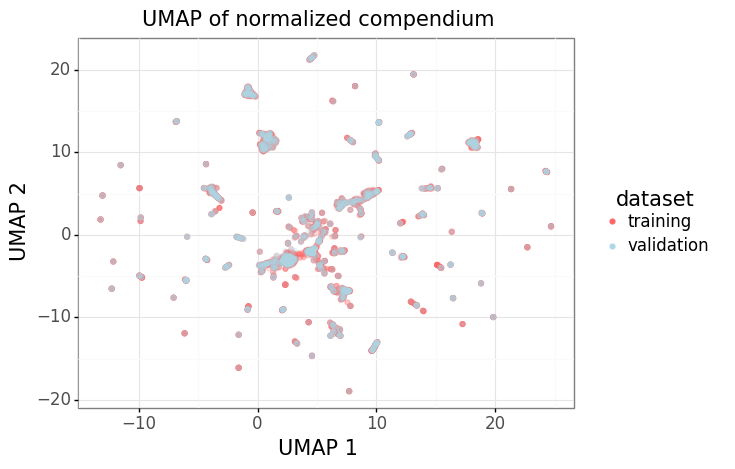

<ggplot: (8727629620997)>


In [12]:
# Plot
fig = ggplot(input_data_UMAPencoded_df, aes(x='1', y='2'))
fig += geom_point(aes(color='dataset'), alpha=0.2)
fig += labs(x ='UMAP 1',
            y = 'UMAP 2',
            title = 'UMAP of normalized compendium')
fig += theme_bw()
fig += theme(
    legend_title_align = "center",
    plot_background=element_rect(fill='white'),
    legend_key=element_rect(fill='white', colour='white'), 
    legend_title=element_text(family='sans-serif', size=15),
    legend_text=element_text(family='sans-serif', size=12),
    plot_title=element_text(family='sans-serif', size=15),
    axis_text=element_text(family='sans-serif', size=12),
    axis_title=element_text(family='sans-serif', size=15)
    )
fig += guides(colour=guide_legend(override_aes={'alpha': 1}))
fig += scale_color_manual(['#ff6666', '#add8e6'])

print(fig)

**Observations:**
* There looks to be a good amount of variance in the compendium overall.
* Using a split of 25% seems to get a similar distribution of data between training and validation sets.
* Remember, the dataset is in 17K dimensional space, which will make the small clusters difficult to represent during training

Overall, having so many features in our dataset, points to the need for more samples to represent the structure in the compendium. For now, we are limited by memory to only select a subset of recount2, but in a future iteration perhaps this will be updated.